<a href="https://colab.research.google.com/github/WahyuKhairi06/DeepLearning-WahyuKhairi-2311531009/blob/main/Praktikum%202/CNN_Praktikum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader


In [4]:
# 1. Load dataset dan transformasi
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)


In [5]:
# 2. Definisikan model CNN
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(nn.ReLU()(self.conv1(x)))
        x = self.pool(nn.ReLU()(self.conv2(x)))
        x = x.view(-1, 32 * 7 * 7)
        x = nn.ReLU()(self.fc1(x))
        x = self.fc2(x)
        return x


In [6]:
# 3. Inisialisasi model, loss, optimizer
model = CNNModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [7]:
# 4. Training
epochs = 5
train_loss = []
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss.append(running_loss/len(trainloader))
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(trainloader):.4f}')


Epoch [1/5], Loss: 0.1915
Epoch [2/5], Loss: 0.0541
Epoch [3/5], Loss: 0.0360
Epoch [4/5], Loss: 0.0275
Epoch [5/5], Loss: 0.0207


In [8]:
# 5. Evaluasi
correct, total = 0, 0
with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'Akurasi Uji: {100 * correct / total:.2f}%')



Akurasi Uji: 98.97%


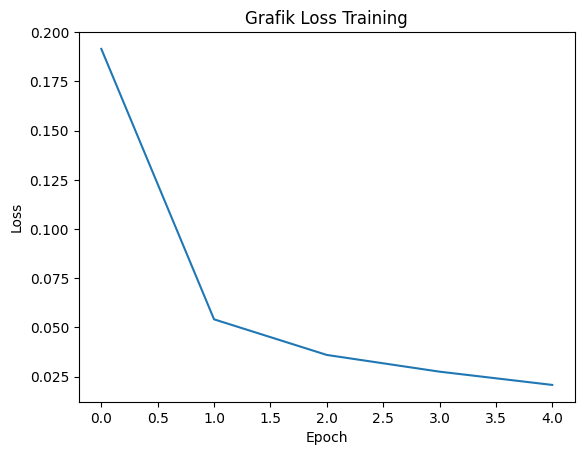

In [9]:
# 6. Plot grafik loss
plt.plot(train_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Grafik Loss Training')
plt.show()


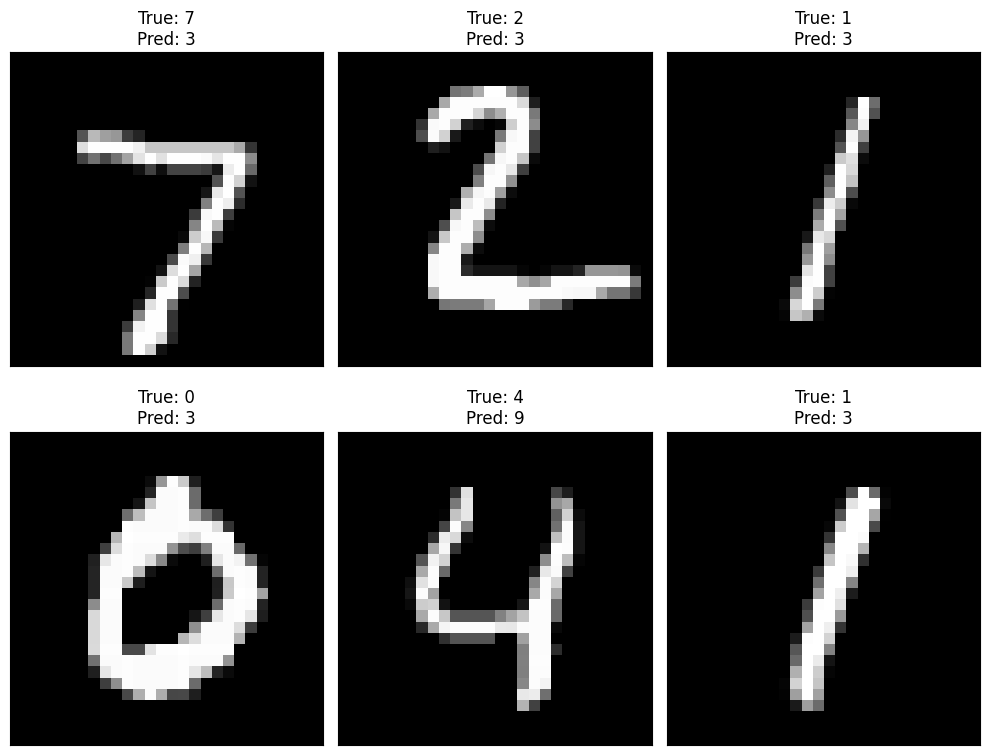

In [8]:
# 7. Tampilkan contoh citra dan prediksi

# Memastikan testloader didefinisikan jika belum ada di konteks saat ini
import torchvision.transforms as transforms
import torchvision
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# Definisikan model CNN (diulang agar sel ini dapat berdiri sendiri)
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(nn.ReLU()(self.conv1(x)))
        x = self.pool(nn.ReLU()(self.conv2(x)))
        x = x.view(-1, 32 * 7 * 7)
        x = nn.ReLU()(self.fc1(x))
        x = self.fc2(x)
        return x

# Inisialisasi model (diulang agar sel ini dapat berdiri sendiri)
model = CNNModel()
# Anda mungkin perlu memuat state_dict model yang sudah dilatih di sini jika tidak ingin melatih ulang
# Contoh: model.load_state_dict(torch.load('path_to_your_model.pth'))

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Ambil satu batch dari testloader
dataiter = iter(testloader)
images, labels = next(dataiter)

# Pastikan model berada dalam mode evaluasi
model.eval()

# Lakukan prediksi untuk seluruh batch
with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)

# Tampilkan beberapa citra dan prediksi
fig = plt.figure(figsize=(10, 8))
for i in range(6): # Tampilkan 6 contoh
    ax = fig.add_subplot(2, 3, i + 1, xticks=[], yticks=[])
    ax.imshow(images[i].squeeze().numpy(), cmap='gray')
    ax.set_title(f'True: {labels[i].item()}\nPred: {predicted[i].item()}')
plt.tight_layout()
plt.show()